<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Deep_Learning_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
from torch import nn
from torch.utils.data import  dataloader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [10]:
#We set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [38]:
#We load the training data 
train = datasets.FashionMNIST(
    root = "data",
    train = True,
    download =True,
    transform= ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype= torch.float).scatter_(0, torch.tensor(y), value=1))
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [39]:
#Load the test set 
test = datasets.FashionMNIST(
    root = "data", 
    download = True,
    train= False, 
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype =torch.float).scatter_(0,torch.tensor(y), value = 1))
    ) 

In [43]:
#We can now iterate and visualize the dataset 
#We create a dictionary that maps the 10 classes to index values 
class_names = {
    0:"T-SHirt",
    1:"Trouser",
    2:"Pull-over",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle-Boot"
}

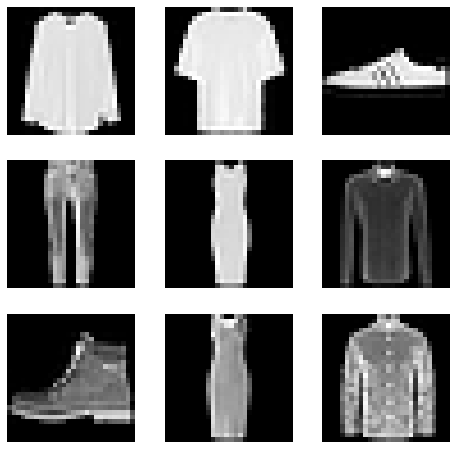

In [48]:
figure = plt.figure(figsize=(8,8))
cols,rows = 3,3
for i in range(1,rows* cols+1):
  sample_idx = torch.randint(len(train), size=(1,)).item()
  img, label = train[sample_idx]
  figure.add_subplot(rows,cols,i)
  #plt.title(class_names[label])
  plt.axis("off")
  plt.imshow(img.squeeze(),cmap="gray")

In [173]:
#Creating a custom dataset for our files
#import os
#import pandas
#from torchvision.io import read_image

#class CustomImageDataset(dataset):
 # def __init_(self, annotation_file, image_labels, image_dir,transform= None, target_transform= None):
  #  self.image_labels = pd.read_csv(annotation_file)

In [122]:
#Build the neural network 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten =  nn.Flatten()
    self.layers_relu = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self,x): #Indentation error
      x = self.flatten(x)
      logits = self.layers_relu(x)
      return logits

In [124]:
model = NeuralNetwork().to(device)

In [130]:
x = torch.randn(1,28,28, device = device)
logits = model(x)
pred_probab = nn.Softmax(dim=1)(logits) #Prediction probability distribution
y_pred = pred_probab.argmax(1)#This function returns the argument with the maximum value from the probability distribution

In [132]:
import torch

In [143]:
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3, requires_grad=True) #requires_grad  tells pytorch these parameter requires it gradient to be calculated
b= torch.randn(3,requires_grad=True)
z = torch.matmul(x,w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y) #calculate the loss functions

In [144]:
z.grad_fn


In [146]:
print(f"Calculate:{z.grad_fn}")

Calculate:<AddBackward0 object at 0x7f4777917850>


In [147]:
#To compute the derivative of the loss with respect to specific parameters we 
#we call loss.backward()
loss.backward()

In [150]:
#We the obtain the values calculated 
print(w.grad)
print(b.grad)
#We can only obtain the grad properties of the leaf nodes in our computational graph , for all other nodes in our graph this property will not be available

tensor([[0.2322, 0.2455, 0.3219],
        [0.2322, 0.2455, 0.3219],
        [0.2322, 0.2455, 0.3219],
        [0.2322, 0.2455, 0.3219],
        [0.2322, 0.2455, 0.3219]])
tensor([0.2322, 0.2455, 0.3219])


In [151]:
#If we need to do several backward calls on the same graph  we need to pass in the retain_graph and set it to True to call a backward function

In [159]:
z = torch.matmul(x,w) + b
print(z.requires_grad)

True


In [160]:
with torch.no_grad():
  z = torch.matmul(x,w) +b
  print(z.requires_grad)

False


In [166]:
#Another way to achieve this is to use the detach method on the tensor
#Another way to disable gradient tracking history 
z = torch.matmul(x,w) + b
z_detach = z.detach() 
print(z_detach.requires_grad)

False


In [171]:
#Another way to disable gradient tracking is to freeze parameters 
#This is often used in fine tuning a pretrained neural network
#Reasons for disabling gradient tracking:
#to mark some parameters as frozen in your neural network, this is a common practice when fine-tuning a neural network
# To speed up computations when you are only doing a forward pass because computations on tensors that do not track gradients are computationally efficient

In [172]:
#More on computational Graphs